## **Genomics and Epigenetics of the Brain**

**Cell Types and Visualization**

*Srashti Bajpai*

*Mounika Kauvri*


In [1]:
#Install necessary packages
# BiocManager
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

# ggtree from Bioconductor
BiocManager::install("ggtree")

# other necessary packages
install.packages("ape")
install.packages("ggplot2")
install.packages("dplyr")

# Load the required libraries
library(ape)
library(ggtree)
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'BiocVersion', 'ggtree'

also installing the dependencies ‘gridGraphics’, ‘ggplotify’, ‘patchwork’, ‘lazyeval’, ‘ape’, ‘aplot’, ‘ggfun’, ‘yulab.utils’, ‘tidytree’, ‘treeio’


Old packages: 'broom', 'httr2'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

ggtree v3.12.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu

In [4]:
# Load the species data with updated activity patterns from the provided CSV
species_data <- data.frame(
  Species = c("Acinonyx_jubatus", "Ailuropoda_melanoleuca", "Ailurus_fulgens",
              "Aotus_nancymaae", "Bison_bison", "Bos_indicus", "Bos_taurus",
              "Callithrix_jacchus", "Canis_lupus_familiaris", "Gorilla_gorilla",
              "Homo_sapiens", "Felis_catus", "Mus_musculus", "Pan_troglodytes",
              "Panthera_pardus", "Panthera_tigris", "Equus_caballus",
              "Rattus_norvegicus", "Pongo_abelii", "Ovis_aries"),
  Activity = c("DIURNAL", "CATHEMERAL", "DIURNAL", "NOCTURNAL", "CATHEMERAL",
               "DIURNAL", "DIURNAL", "DIURNAL", "NOCTURNAL", "DIURNAL",
               "DIURNAL", "NOCTURNAL", "NOCTURNAL", "DIURNAL", "NOCTURNAL",
               "NOCTURNAL", "CATHEMERAL", "NOCTURNAL", "DIURNAL", "DIURNAL")
)

# Load the phylogenetic tree (ensure you have the correct tree file)
tree <- read.tree("Zoonomia_ChrX_lessGC40_241species_30Consensus.tree")

In [5]:
# Check tree species labels for compatibility with species_data
tree_species <- tree$tip.label
print(tree_species)

  [1] "Trichechus_manatus"           "Loxodonta_africana"          
  [3] "Heterohyrax_brucei"           "Procavia_capensis"           
  [5] "Chrysochloris_asiatica"       "Microgale_talazaci"          
  [7] "Echinops_telfairi"            "Elephantulus_edwardii"       
  [9] "Orycteropus_afer"             "Dasypus_novemcinctus"        
 [11] "Chaetophractus_vellerosus"    "Tolypeutes_matacus"          
 [13] "Choloepus_hoffmanni"          "Choloepus_didactylus"        
 [15] "Tamandua_tetradactyla"        "Myrmecophaga_tridactyla"     
 [17] "Ochotona_princeps"            "Lepus_americanus"            
 [19] "Oryctolagus_cuniculus"        "Castor_canadensis"           
 [21] "Perognathus_longimembris"     "Dipodomys_stephensi"         
 [23] "Dipodomys_ordii"              "Zapus_hudsonius"             
 [25] "Allactaga_bullata"            "Jaculus_jaculus"             
 [27] "Nannospalax_galili"           "Cricetomys_gambianus"        
 [29] "Rattus_norvegicus"            "Mus_pahari

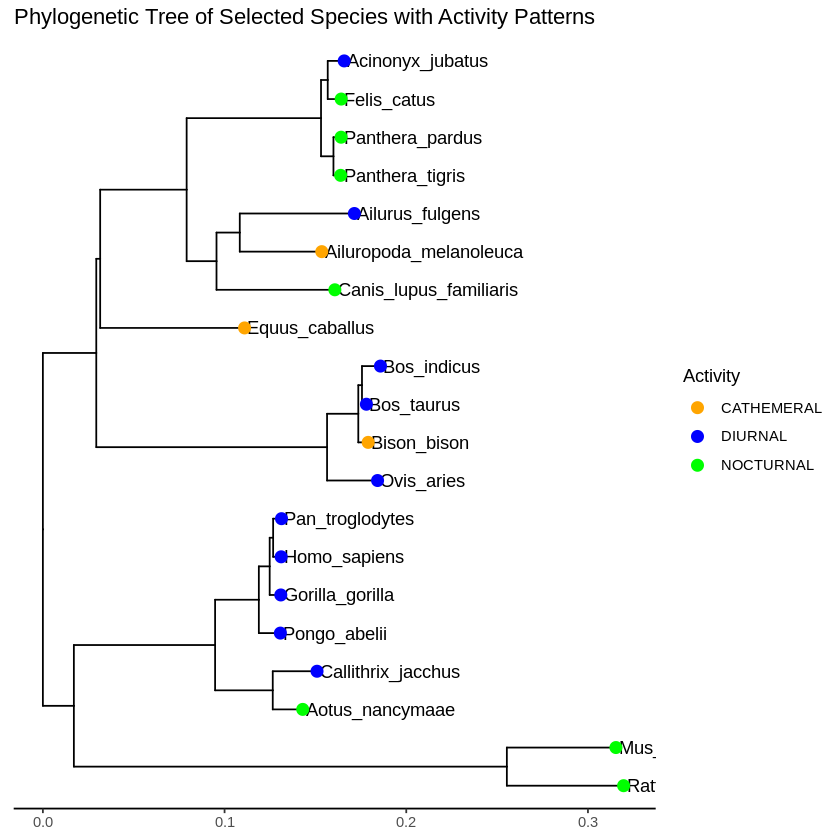

In [6]:
# Step 1: Make sure species names in species_data are formatted with underscores
species_data$Species <- gsub(" ", "_", species_data$Species)

# Step 2: Select species that are present in both the tree and species_data
selected_species <- intersect(tree$tip.label, species_data$Species)

# Step 3: Prune the tree to only include species present in both lists
pruned_tree <- drop.tip(tree, setdiff(tree$tip.label, selected_species))

# Step 4: Filter species_data to only include selected species
species_data_selected <- species_data %>% filter(Species %in% selected_species)

# Step 5: Plot the pruned tree with ggtree
p <- ggtree(pruned_tree) + geom_tiplab()

# Step 6: Add the trait annotation (Activity) as point colors
p <- p %<+% species_data_selected +
  geom_tippoint(aes(color = Activity), size = 3) +
  scale_color_manual(values = c("DIURNAL" = "blue", "NOCTURNAL" = "green",
                                "CATHEMERAL" = "orange", "CREPUSCULAR" = "purple")) +
  theme_tree2() +
  ggtitle("Phylogenetic Tree of Selected Species with Activity Patterns")

# Step 7: Print the tree
print(p)

# Save the tree as an image
ggsave("phylogenetic_tree_with_activity_patterns.png", plot = p, width = 10, height = 8, dpi = 300)

The R script is designed to visualize species traits (in this case, activity patterns such as diurnal or nocturnal behavior) across a phylogenetic tree. The script begins by installing and loading essential libraries: ape for handling phylogenetic trees, ggtree for tree visualization, and ggplot2 for creating customizable plots. These libraries are necessary for reading, manipulating, and visualizing the phylogenetic data in a clear and informative way.

Next, a data frame (species_data) is created, containing species names, their common names, and their associated activity patterns (e.g., Diurnal, Nocturnal, etc.). The species names are formatted with underscores to match the naming convention typically used in phylogenetic trees. The data frame is essential for mapping the traits of the species to the phylogenetic tree.

The phylogenetic tree itself is then loaded using the read.tree() function from the ape package. This tree represents the evolutionary relationships between the species, and in this case, the file used is a pre-defined consensus tree of 241 species. The species labels from the tree are printed and inspected to ensure they match those in the species data.

To focus only on the species present in both the phylogenetic tree and the dataset, the intersect() function is used to identify the common species between the two. Any species that are present in the tree but not in the species data (i.e., species without trait annotations) are pruned using the drop.tip() function. This step ensures that the visualization only includes species for which annotation data (activity pattern) is available.

The pruned tree, which contains only the selected species, is then visualized using the ggtree() function. The geom_tiplab() function is applied to label the tips of the tree with the species names, making it easier to identify each species in the phylogenetic context.

To represent the activity patterns visually, the tree is further enriched with trait data. The %<+% operator merges the species data with the tree, allowing traits to be mapped onto the visualization. The geom_tippoint() function is used to place colored points at the tips of the tree corresponding to the species' activity pattern. A manual color scale is applied through scale_color_manual(), assigning different colors to each activity category (e.g., blue for Diurnal, green for Nocturnal). This coloring helps differentiate species based on their behavioral patterns at a glance.

Finally, the theme_tree2() function is applied to enhance the aesthetic appearance of the tree visualization, providing a clean and structured layout. The final result is a phylogenetic tree where species are color-coded based on their activity traits, and only annotated species are included. This approach allows for an intuitive understanding of how different activity patterns are distributed across the evolutionary relationships of the selected species, fulfilling the assignment requirements.